In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(color_codes=True)

In [2]:
ipe = pd.read_csv('ipe.csv', index_col='fecha', parse_dates=True, dayfirst=True)
ipe.tail()

,IPE,IPE NyEE,IPE Apoyo Emp.
fecha,,,
2020-03-01,-22.31,-23.12,-21.51
2020-06-01,-16.44,-13.35,-19.53
2020-09-01,-1.54,4.16,-7.23
2020-12-01,1.36,11.19,-8.46
2021-03-01,-0.40,10.39,-11.19


In [3]:
ipe.index

DatetimeIndex(['2017-09-01', '2017-12-01', '2018-03-01', '2018-06-01',
               '2018-09-01', '2018-12-01', '2019-03-01', '2019-06-01',
               '2019-09-01', '2019-12-01', '2020-03-01', '2020-06-01',
               '2020-09-01', '2020-12-01', '2021-03-01'],
              dtype='datetime64[ns]', name='fecha', freq=None)

In [4]:
ipec = pd.read_csv('ipe_comparado.csv', index_col='fecha', parse_dates=True, dayfirst=True)
ipec = ipec[['Nacional', 'Araucanía', 'Valparaíso (1)', 'Maule']]
ipec.tail()

,Nacional,Araucanía,Valparaíso (1),Maule
fecha,,,,
2021-02-01,9.014656,-19.4,NaN,-6.2
2021-03-01,6.794963,-24.5,9.2,-14.0
2021-04-01,-3.509817,-33.3,NaN,-9.0
2021-05-01,0.930573,-19.0,NaN,-3.0
2021-06-01,5.280328,-9.2,18.2,4.5


In [5]:
ipec = pd.concat([ipec, ipe], axis=1)
ipec = ipec.interpolate(limit_area='inside')
ipec['Nacional-m3'] = ipec['Nacional'].rolling(3).mean()

# Gráfico 1

IPEs junto al promedio móvil trimestral del ICE. Los IPEs fueron mensualizados usando interpolación lineal.

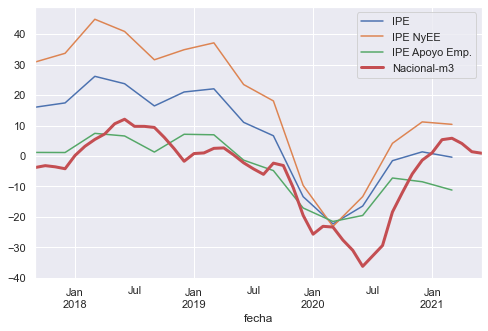

In [6]:
ipec[['IPE', 'IPE NyEE','IPE Apoyo Emp.']]['2017-09':].plot(figsize=(8,5))
ipec['Nacional-m3']['2017-09':].plot(linewidth=3)
plt.legend()

# Gráfico 2

IPEs junto a todos los índices de confianza empresarial. Todos los índices fueron mensualizados usando interpolación lineal.

<AxesSubplot:xlabel='fecha'>

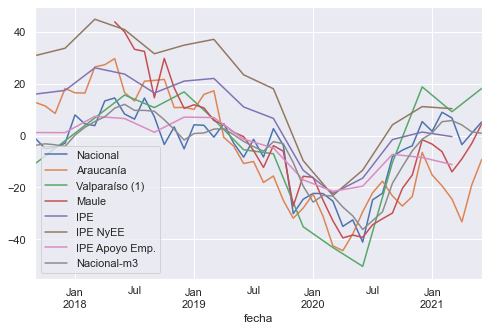

In [7]:
ipec['2017-09':].plot(figsize=(8,5))

# Gráfico 3

Heatmap de la matriz de correlaciones de los índices de confianza. Todos fueron mensualizados.

<AxesSubplot:>

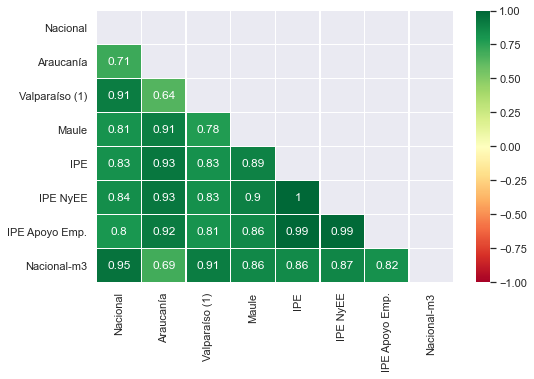

In [8]:
corr_mat = ipec.corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
fig, ax =plt.subplots(figsize=(8,5))
sns.heatmap(corr_mat, mask=mask, annot=True, cmap='RdYlGn', linewidth=0.4, ax=ax, vmin=-1, vmax=1)

In [9]:
imacec = pd.read_csv('imacec.csv', index_col='fecha', parse_dates=True, dayfirst=True)
imacec = pd.concat([imacec, ipec[['IPE', 'IPE NyEE', 'IPE Apoyo Emp.']]], axis=1)
imacec.tail()

,Imacec,IPE,IPE NyEE,IPE Apoyo Emp.
fecha,,,,
2021-02-01,-2.08,0.186667,10.656667,-10.28
2021-03-01,5.77,-0.400000,10.390000,-11.19
2021-04-01,14.05,NaN,NaN,NaN
2021-05-01,18.10,NaN,NaN,NaN
2021-06-01,NaN,NaN,NaN,NaN


# Gráfico 4

IPEs junto a la tasa de crecimiento anual del IMACEC. Los IPEs fueron mensualizados usando interpolación lineal.

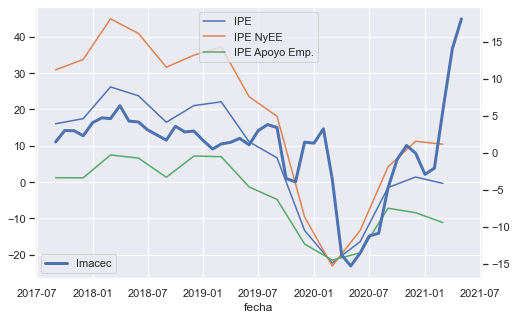

In [75]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(pib[['IPE', 'IPE NyEE','IPE Apoyo Emp.']]['2017-09':])
ax1.set_xlabel('fecha')
ax1.legend(['IPE', 'IPE NyEE','IPE Apoyo Emp.'], loc='upper center')

ax2 = ax1.twinx()
ax2.plot(imacec['Imacec']['2017-09':], linewidth=3, label='PIB')
ax2.legend(['Imacec'], loc='lower left')
ax2.grid(False)

# Gráfico 5

Heatmap de la matriz de correlaciones de los IPEs e Imacec. Los IPEs fueron mensualizados.

<AxesSubplot:>

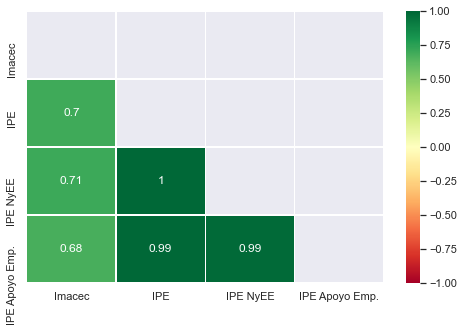

In [11]:
corr_mat = imacec.corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
fig, ax =plt.subplots(figsize=(8,5))
sns.heatmap(corr_mat, mask=mask, annot=True, cmap='RdYlGn', linewidth=0.4, ax=ax, vmin=-1, vmax=1)

In [14]:
laboral = pd.read_csv('laboral.csv', index_col='fecha', parse_dates=True, dayfirst=True)
laboral = pd.concat([laboral, ipec[['IPE', 'IPE NyEE', 'IPE Apoyo Emp.']]], axis=1)
laboral.tail()

,Desempleo,Ocupación (var 12 m),IPE,IPE NyEE,IPE Apoyo Emp.
fecha,,,,,
2021-02-01,10.304521,-9.883190,0.186667,10.656667,-10.28
2021-03-01,10.353810,-8.881472,-0.400000,10.390000,-11.19
2021-04-01,10.244367,-1.600329,NaN,NaN,NaN
2021-05-01,10.037301,7.926798,NaN,NaN,NaN
2021-06-01,NaN,NaN,NaN,NaN,NaN


# Gráfico 6

IPEs junto a la tasa de desempleo. Los IPEs fueron mensualizados usando interpolación lineal.

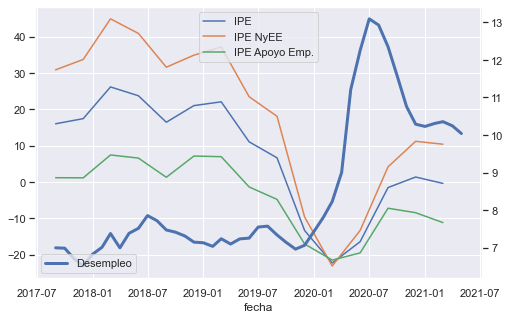

In [67]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(pib[['IPE', 'IPE NyEE','IPE Apoyo Emp.']]['2017-09':])
ax1.set_xlabel('fecha')
ax1.legend(['IPE', 'IPE NyEE','IPE Apoyo Emp.'], loc='upper center')

ax2 = ax1.twinx()
ax2.plot(laboral['Desempleo']['2017-09':], linewidth=3, label='PIB')
ax2.legend(['Desempleo'], loc='lower left')
ax2.grid(False)

# Gráfico 7

IPEs junto a la tasa de crecmiento anual del empleoOcupación (var 12 m). Los IPEs fueron mensualizados usando interpolación lineal.

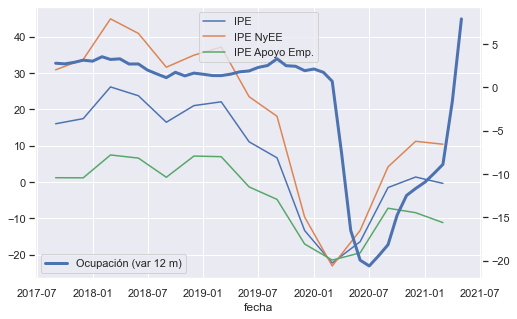

In [68]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(pib[['IPE', 'IPE NyEE','IPE Apoyo Emp.']]['2017-09':])
ax1.set_xlabel('fecha')
ax1.legend(['IPE', 'IPE NyEE','IPE Apoyo Emp.'], loc='upper center')

ax2 = ax1.twinx()
ax2.plot(laboral['Ocupación (var 12 m)']['2017-09':], linewidth=3, label='PIB')
ax2.legend(['Ocupación (var 12 m)'], loc='lower left')
ax2.grid(False)

In [24]:
pib = pd.read_csv('pib.csv', index_col='fecha', parse_dates=True, dayfirst=True)
pib = pd.concat([pib, ipe], axis=1)
pib.tail()

,Inversión,PIB,IPE,IPE NyEE,IPE Apoyo Emp.
fecha,,,,,
2020-03-01,-0.035245,0.174888,-22.31,-23.12,-21.51
2020-06-01,-19.791276,-14.248627,-16.44,-13.35,-19.53
2020-09-01,-17.044427,-8.998803,-1.54,4.16,-7.23
2020-12-01,-8.874323,0.005533,1.36,11.19,-8.46
2021-03-01,0.707847,0.336582,-0.40,10.39,-11.19


# Gráfico 8

IPEs junto a la tasa de crecimiento anual de la inversión (respecto al mismo periodo del año anterior).

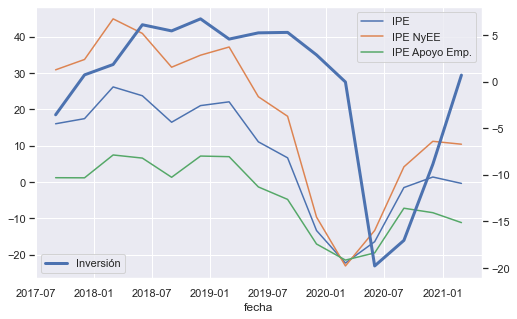

In [69]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(pib[['IPE', 'IPE NyEE','IPE Apoyo Emp.']]['2017-09':])
ax1.set_xlabel('fecha')
ax1.legend(['IPE', 'IPE NyEE','IPE Apoyo Emp.'], loc='upper right')

ax2 = ax1.twinx()
ax2.plot(pib['Inversión']['2017-09':], linewidth=3, label='PIB')
ax2.legend(['Inversión'], loc='lower left')
ax2.grid(False)

# Gráfico 9

IPEs junto a la tasa de crecimiento anual del PIB (respecto al mismo periodo del año anterior).

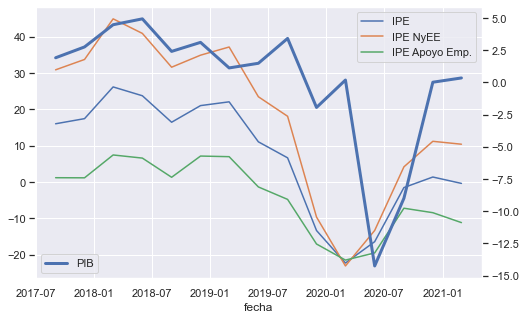

In [70]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(pib[['IPE', 'IPE NyEE','IPE Apoyo Emp.']]['2017-09':])
ax1.set_xlabel('fecha')
ax1.legend(['IPE', 'IPE NyEE','IPE Apoyo Emp.'], loc='upper right')

ax2 = ax1.twinx()
ax2.plot(pib['PIB']['2017-09':], linewidth=3, label='PIB')
ax2.legend(['PIB'], loc='lower left')
ax2.grid(False)

In [73]:
comercio = pd.read_csv('comercio.csv', index_col='fecha', parse_dates=True, dayfirst=True)
comercio = pd.concat([comercio, ipec[['IPE', 'IPE NyEE', 'IPE Apoyo Emp.']]], axis=1)
comercio.tail()

,Índice de ventas CNC,IAC INE,IPE,IPE NyEE,IPE Apoyo Emp.
fecha,,,,,
2021-02-01,-6.372258,3.668532,0.186667,10.656667,-10.28
2021-03-01,-3.905562,23.456451,-0.400000,10.390000,-11.19
2021-04-01,-0.922617,43.261713,NaN,NaN,NaN
2021-05-01,78.792576,72.112511,NaN,NaN,NaN
2021-06-01,NaN,NaN,NaN,NaN,NaN


# Gráfico 10

IPEs junto a índice de ventas del comercio de la CNC.

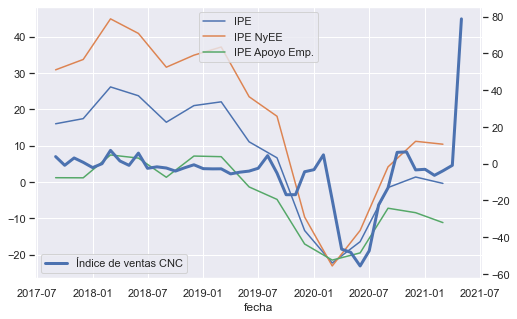

In [76]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(pib[['IPE', 'IPE NyEE','IPE Apoyo Emp.']]['2017-09':])
ax1.set_xlabel('fecha')
ax1.legend(['IPE', 'IPE NyEE','IPE Apoyo Emp.'], loc='upper center')

ax2 = ax1.twinx()
ax2.plot(comercio['Índice de ventas CNC']['2017-09':], linewidth=3, label='PIB')
ax2.legend(['Índice de ventas CNC'], loc='lower left')
ax2.grid(False)

# Gráfico 10

IPEs junto a índice de actividad del comercio del INE.

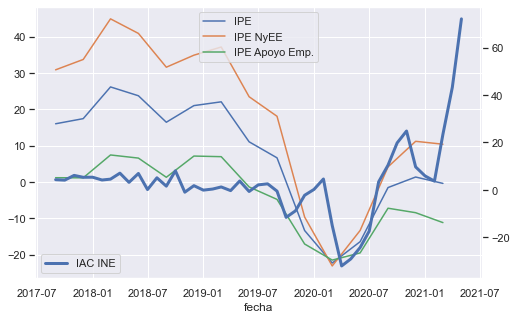

In [78]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(pib[['IPE', 'IPE NyEE','IPE Apoyo Emp.']]['2017-09':])
ax1.set_xlabel('fecha')
ax1.legend(['IPE', 'IPE NyEE','IPE Apoyo Emp.'], loc='upper center')

ax2 = ax1.twinx()
ax2.plot(comercio['IAC INE']['2017-09':], linewidth=3, label='PIB')
ax2.legend(['IAC INE'], loc='lower left')
ax2.grid(False)